In [1]:
%matplotlib inline

In [2]:
import torch
from torch.distributions import multinomial

In [3]:
fair_probs = torch.ones([6])/6

In [4]:
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [5]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [6]:
multinomial.Multinomial(100, fair_probs).sample()

tensor([10., 16., 19., 17., 18., 20.])

In [7]:
multinomial.Multinomial(100, fair_probs).sample((2,))

tensor([[16., 18., 16., 16., 12., 22.],
        [22., 15., 19., 16., 13., 15.]])

In [8]:
counts = multinomial.Multinomial(100, fair_probs).sample((500,))

In [9]:
counts

tensor([[11., 18., 15., 17., 20., 19.],
        [18., 15., 21., 19., 14., 13.],
        [14., 15., 18., 17., 21., 15.],
        ...,
        [15., 12., 22., 14., 18., 19.],
        [ 9., 24., 17., 17., 16., 17.],
        [20., 18., 16., 23., 13., 10.]])

In [10]:
cum_counts = counts.cumsum(dim=0)

In [11]:
cum_counts

tensor([[  11.,   18.,   15.,   17.,   20.,   19.],
        [  29.,   33.,   36.,   36.,   34.,   32.],
        [  43.,   48.,   54.,   53.,   55.,   47.],
        ...,
        [8331., 8306., 8362., 8293., 8327., 8181.],
        [8340., 8330., 8379., 8310., 8343., 8198.],
        [8360., 8348., 8395., 8333., 8356., 8208.]])

In [12]:
cum_counts.sum(dim=1, keepdim=True)

tensor([[  100.],
        [  200.],
        [  300.],
        [  400.],
        [  500.],
        [  600.],
        [  700.],
        [  800.],
        [  900.],
        [ 1000.],
        [ 1100.],
        [ 1200.],
        [ 1300.],
        [ 1400.],
        [ 1500.],
        [ 1600.],
        [ 1700.],
        [ 1800.],
        [ 1900.],
        [ 2000.],
        [ 2100.],
        [ 2200.],
        [ 2300.],
        [ 2400.],
        [ 2500.],
        [ 2600.],
        [ 2700.],
        [ 2800.],
        [ 2900.],
        [ 3000.],
        [ 3100.],
        [ 3200.],
        [ 3300.],
        [ 3400.],
        [ 3500.],
        [ 3600.],
        [ 3700.],
        [ 3800.],
        [ 3900.],
        [ 4000.],
        [ 4100.],
        [ 4200.],
        [ 4300.],
        [ 4400.],
        [ 4500.],
        [ 4600.],
        [ 4700.],
        [ 4800.],
        [ 4900.],
        [ 5000.],
        [ 5100.],
        [ 5200.],
        [ 5300.],
        [ 5400.],
        [ 5500.],
        [ 

In [13]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)

In [14]:
estimates

tensor([[0.1100, 0.1800, 0.1500, 0.1700, 0.2000, 0.1900],
        [0.1450, 0.1650, 0.1800, 0.1800, 0.1700, 0.1600],
        [0.1433, 0.1600, 0.1800, 0.1767, 0.1833, 0.1567],
        ...,
        [0.1673, 0.1668, 0.1679, 0.1665, 0.1672, 0.1643],
        [0.1671, 0.1669, 0.1679, 0.1665, 0.1672, 0.1643],
        [0.1672, 0.1670, 0.1679, 0.1667, 0.1671, 0.1642]])

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

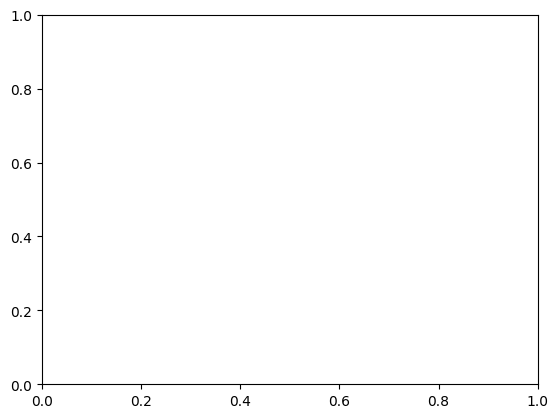

In [16]:
fig, ax = plt.subplots()

In [17]:
fig.set_figheight(4.5)
fig.set_figwidth(6)

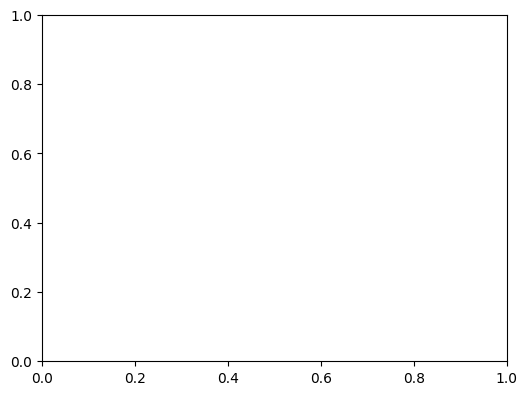

In [18]:
fig

In [19]:
for i in range(6):
    ax.plot(estimates[:, i].numpy(), label=("P(die=)" + str(i + 1) + ")"))

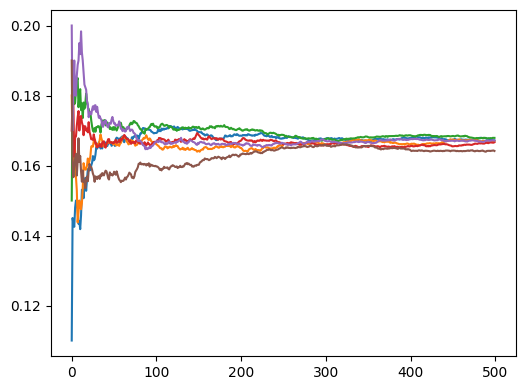

In [20]:
fig

In [23]:
ax.axhline(y=0.167, color='black', linestyle='dashed')

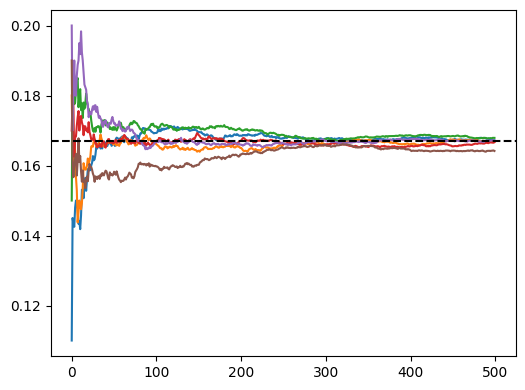

In [24]:
fig

In [25]:
ax.set_xlabel('Groups of Experiments')
ax.set_ylabel('Estimated probobility')

Text(4.444444444444452, 0.5, 'Estimated probobility')

In [26]:
ax.legend()

In [27]:
fig